## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, TargetEncoder


In [2]:
train_url = 'train_adikara2024.csv'
test_url = 'test_adikara2024_unlabeled.csv'

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train.head()

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0
1,60601,South Africa,2002,7,43.9
2,64399,Japan,2004,8,89.8
3,24227,France,1983,1,48.9
4,63779,Japan,2004,4,90.2


In [3]:
test.head()

,id,Country,Year,Month
0,99116,Italy,2023,4
1,97687,Denmark,2022,7
2,92061,United States,2019,6
3,95122,Netherlands,2021,2
4,92296,Italy,2019,8


### Checking Train Data

In [4]:
print("Train Data missing values:")
print(train.isna().sum())

print("Train Data duplicated: ", train.duplicated().sum())
print('-'*50)

print("Train Data Length: ", len(train))

Train Data missing values:
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64
Train Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


In [5]:
proportion_missing = train.isna().sum() / len(train)
print(proportion_missing)

id                0.000000
Country           0.000000
Year              0.000000
Month             0.000000
FoodPriceIndex    0.029959
dtype: float64


missing value < 0.05 berarti kita remove aja yang missing value (`Complete Case Analysis`)

In [6]:
train.dropna(subset=['FoodPriceIndex'],axis=0,inplace=True)

In [7]:
len(train)

11268

In [ ]:
train.describe()

,id,Year,Month,FoodPriceIndex
count,11268.000000,11268.000000,11268.000000,11268.000000
mean,40920.903621,1991.500444,6.504526,54.084543
std,23617.462494,12.693976,3.450428,30.192230
min,7.000000,1970.000000,1.000000,0.000000
25%,20530.750000,1981.000000,4.000000,29.875000
50%,40889.000000,1991.000000,7.000000,60.300000
75%,61359.000000,2002.000000,9.000000,78.200000
max,81836.000000,2013.000000,12.000000,105.700000


### Checking Test Data

In [9]:
print("Test Data missing values:")
print(test.isna().sum())

print("Test Data duplicated: ", test.duplicated().sum())

print('-'*50)

print("Train Data Length: ", len(train))

Test Data missing values:
id         0
Country    0
Year       0
Month      0
dtype: int64
Test Data duplicated:  0
--------------------------------------------------
Train Data Length:  11268


## EDA

In [10]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(exclude=[np.number]).columns

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  Index(['id', 'Year', 'Month', 'FoodPriceIndex'], dtype='object')
Categorical Columns:  Index(['Country'], dtype='object')


In [11]:
train['Country'].value_counts()

Country
Finland           519
Germany           516
Japan             516
Mexico            515
Greece            515
Sweden            515
Turkey            514
Portugal          513
France            513
Spain             513
Italy             513
Israel            513
United Kingdom    512
Austria           511
Canada            511
Taiwan, China     511
Denmark           509
South Africa      509
Netherlands       509
United States     509
Switzerland       508
Luxembourg        504
Name: count, dtype: int64

In [12]:
test['Country'].value_counts()

Country
Italy             120
Denmark           120
Luxembourg        120
South Africa      120
Austria           120
Sweden            120
Germany           120
Spain             120
Mexico            120
France            120
Greece            120
Switzerland       120
Israel            120
United Kingdom    120
Turkey            120
Taiwan, China     120
Finland           120
Portugal          120
Canada            120
Netherlands       120
United States     120
Japan             120
Name: count, dtype: int64

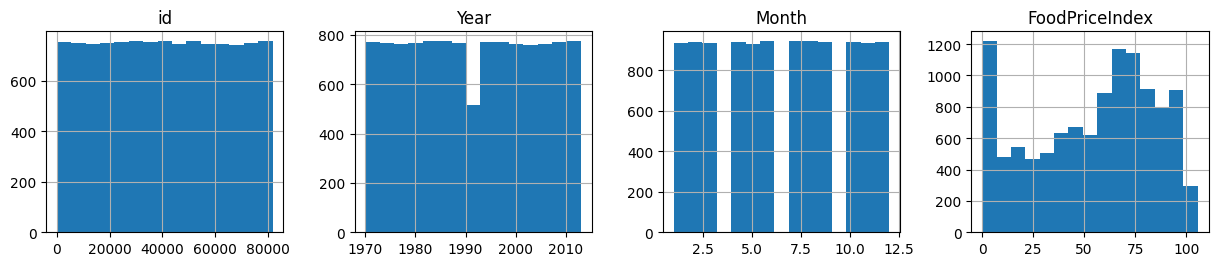

In [13]:
train[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4));

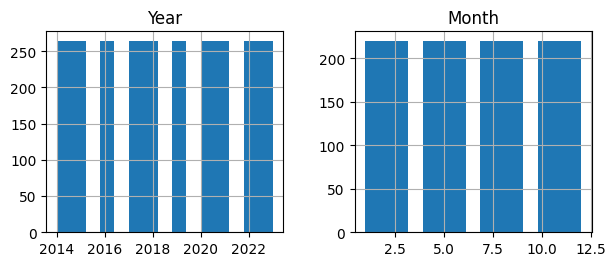

In [14]:
test[['Year', 'Month']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

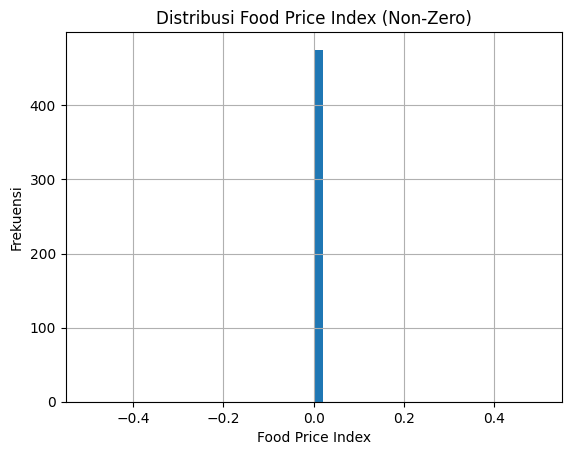

In [15]:
train_non_zero = train[train['FoodPriceIndex'] <= 0]
train_non_zero['FoodPriceIndex'].hist(bins=50)
plt.title('Distribusi Food Price Index (Non-Zero)')
plt.xlabel('Food Price Index')
plt.ylabel('Frekuensi')
plt.show()

Might need to scale our data

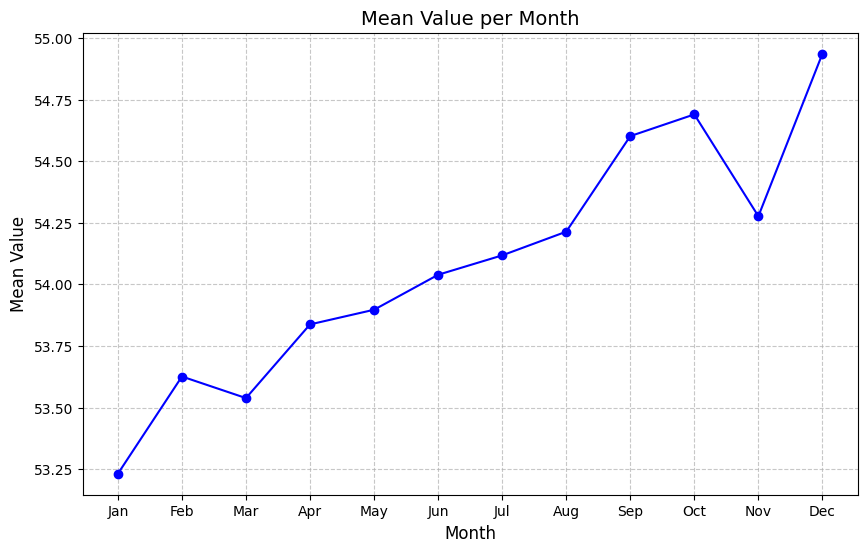

In [16]:
mean_values_by_month = train.groupby('Month')['FoodPriceIndex'].mean()

# Visualisasikan hasilnya
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_month.index, mean_values_by_month.values, marker='o', linestyle='-', color='b')
plt.title('Mean Value per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

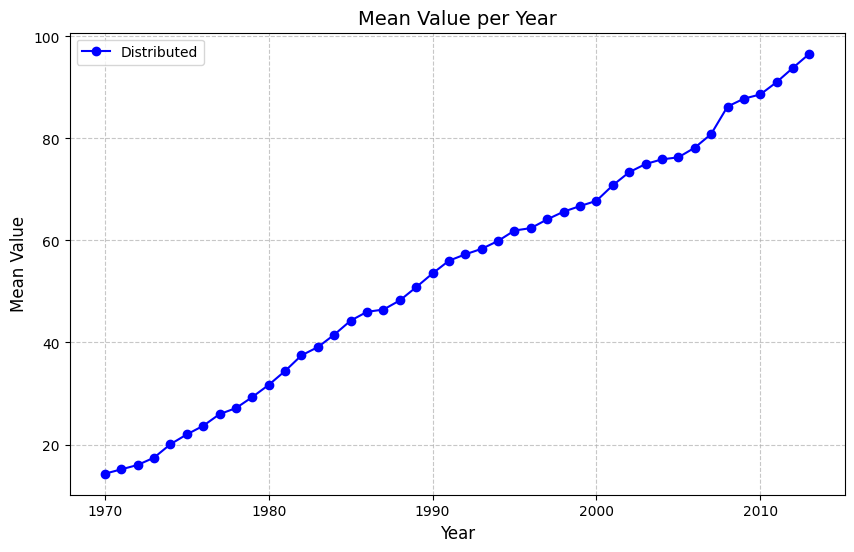

In [17]:
# Hitung mean per tahun
mean_values_by_year = train.groupby('Year')['FoodPriceIndex'].mean()

# Visualisasikan hasilnya
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year.values, 
         marker='o', linestyle='-', color='b', label='Distributed')

plt.title('Mean Value per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


C:\Users\booma\AppData\Local\Temp\ipykernel_21748\2939986758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Country', y='FoodPriceIndex', palette='Set2')


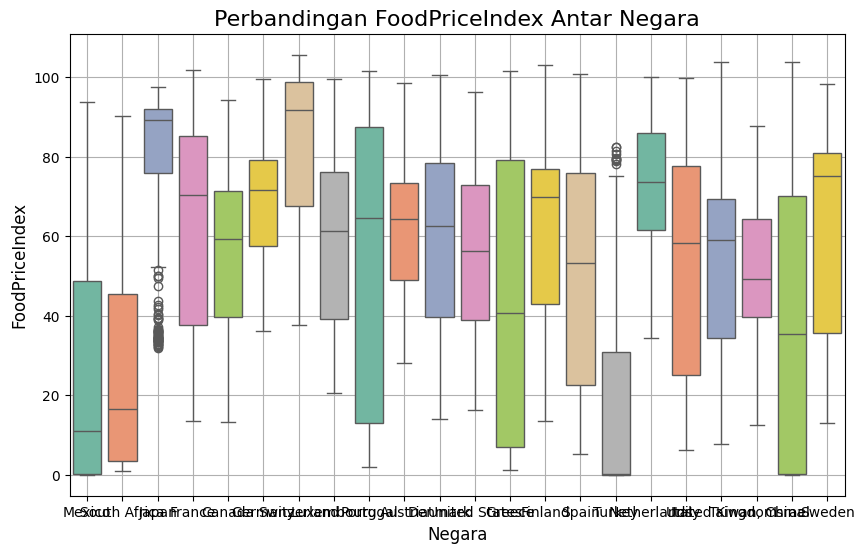

In [18]:
# Boxplot per Negara
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Country', y='FoodPriceIndex', palette='Set2')
plt.title('Perbandingan FoodPriceIndex Antar Negara', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('FoodPriceIndex', fontsize=12)
plt.grid(True)
plt.show()


In [19]:
train['Quarter'] = (train['Month'] - 1) // 3 + 1
test['Quarter'] = (test['Month'] - 1) // 3 + 1

train['Month_Sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_Cos'] = np.cos(2 * np.pi * train['Month'] / 12)

test['Month_Sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_Cos'] = np.cos(2 * np.pi * test['Month'] / 12)

train['Is_Peak_Season'] = train['Quarter'].isin([1, 4]).astype(int)  # Asumsi musim panen di kuartal 1 & 4
test['Is_Peak_Season'] = test['Quarter'].isin([1, 4]).astype(int)  # Asumsi musim panen di kuartal 1 & 4

train['Quarter_Sin'] = np.sin(2 * np.pi * train['Quarter'] / 4)
test['Quarter_Cos'] = np.cos(2 * np.pi * test['Quarter'] / 4)

train['sign'] = train['Month'].apply(lambda x: 1 if x in [3, 11] else 0)

country_avg = train.groupby('Country')['FoodPriceIndex'].mean()
train['Country_AvgPrice'] = train['Country'].map(country_avg)

# Waktu berlalu dari awal dataset
train['Elapsed_Months'] = (train['Year'] - train['Year'].min()) * 12 + train['Month']

# Kombinasi Year dan Month menjadi YYYYMM
train['YearMonth'] = train['Year'] * 100 + train['Month']

# Menambahkan kolom kuartal
train['Quarter'] = ((train['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
train['Semester'] = ((train['Month'] - 1) // 6) + 1

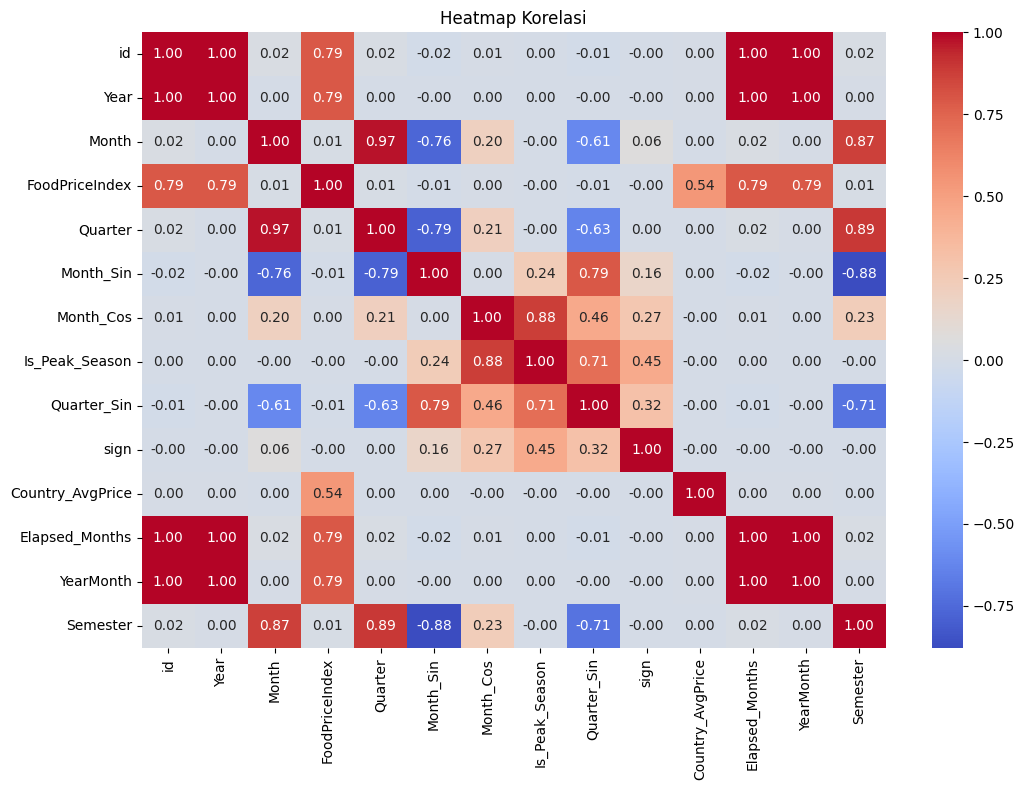

In [31]:
# Hitung matriks korelasi
corr = train.corr(numeric_only=True)  # Pastikan hanya kolom numerik yang digunakan

# Buat heatmap
plt.figure(figsize=(12, 8))  # Atur ukuran figur
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi")
plt.show()

Yang paling berpengaruh dengan `FoodIndex` hanya Year dengan hasil korelasi pearson 0.79.

Method yang bisa diuji (Time Series Forecasting):
- Arima
- Prophet
- RandomForestRegressor

## Modelling

In [33]:
X = train.drop(columns=['FoodPriceIndex', 'id'])
y = train['FoodPriceIndex']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9014, 13), (2254, 13), (9014,), (2254,))

In [36]:
import category_encoders as ce


te = ce.TargetEncoder(cols=['Country'])
X_train = te.fit_transform(X_train, y_train)
X_val = te.transform(X_val)

In [37]:
X_train

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,sign,Country_AvgPrice,Elapsed_Months,YearMonth,Semester
10426,52.708049,1999,5,2,5.000000e-01,-0.866025,0,1.224647e-16,0,53.095517,353,199905,1
6551,59.943839,1992,11,4,-5.000000e-01,0.866025,1,-2.449294e-16,1,59.473870,275,199211,2
8899,71.744059,1990,2,1,8.660254e-01,0.500000,1,1.000000e+00,0,71.803340,242,199002,1
11548,25.432524,2010,6,2,1.224647e-16,-1.000000,0,1.224647e-16,0,25.490485,486,201006,1
9181,71.744059,2001,6,2,1.224647e-16,-1.000000,0,1.224647e-16,0,71.803340,378,200106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,38.852580,1975,6,2,1.224647e-16,-1.000000,0,1.224647e-16,0,38.772515,66,197506,1
5366,50.129975,2004,2,1,8.660254e-01,0.500000,1,1.000000e+00,0,50.526282,410,200402,1
5569,68.940091,2012,4,2,8.660254e-01,-0.500000,0,1.224647e-16,0,68.830241,508,201204,1
884,15.753071,1995,10,4,-8.660254e-01,0.500000,1,-2.449294e-16,0,15.111868,310,199510,2


Evaluasi metrik

In [38]:
# Calculate sMAPE
def smape(A, F):
    denominator = np.abs(A) + np.abs(F)
    numerator = 2 * np.abs(F - A)
    print(f"Denominator: {denominator}")
    print(f"Numerator: {numerator}")
    return 100/len(A) * np.sum(numerator / denominator)


In [51]:
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

In [52]:
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA

# # Sort data by Year and Month to ensure time series order


# # Fit ARIMA model
# model = ARIMA(X_train_sorted['FoodPriceIndex'], order=(1,1,1))
# results = model.fit()

# # Make predictions
# predictions = results.forecast(steps=len(y_val))

# smape_arima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
# print(f'sMAPE: {smape_arima:.2f}%')

# # Plot actual vs predicted values
# plt.figure(figsize=(12,6))
# plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
# plt.plot(predictions.values, label='Predicted')
# plt.title('ARIMA Model: Actual vs Predicted Values')
# plt.legend()
# plt.show()

In [53]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Sort data by Year and Month to ensure time series order
# X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
# X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# # Fit SARIMA model
# # Using order=(1,1,1) for ARIMA part and seasonal_order=(1,1,1,12) for seasonal part
# model = SARIMAX(X_train_sorted['FoodPriceIndex'], 
#                 order=(1,1,1), 
#                 seasonal_order=(1,1,1,12))
# results = model.fit()

# # Make predictions
# predictions = results.forecast(steps=len(y_val))

# smape_sarima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
# print(f'sMAPE: {smape_sarima:.2f}%')

# # Plot actual vs predicted values
# plt.figure(figsize=(12,6))
# plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
# plt.plot(predictions.values, label='Predicted')
# plt.title('SARIMA Model: Actual vs Predicted Values')
# plt.legend()
# plt.show()

In [54]:
# from prophet import Prophet

# # Prepare data for Prophet (requires 'ds' and 'y' columns)
# # Sort by date and reset index
# prophet_train = pd.DataFrame({
#     'ds': pd.to_datetime(X_train_sorted['Year'].astype(str) + '-' + X_train_sorted['Month'].astype(str) + '-01'),
#     'y': X_train_sorted['FoodPriceIndex']
# })

# prophet_val = pd.DataFrame({
#     'ds': pd.to_datetime(X_val_sorted['Year'].astype(str) + '-' + X_val_sorted['Month'].astype(str) + '-01'),
#     'y': X_val_sorted['FoodPriceIndex']
# })

# # Fit Prophet model
# model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
# model.fit(prophet_train)

# # Make predictions
# forecast = model.predict(prophet_val)

# # Calculate sMAPE
# smape_prophet = smape(prophet_val['y'].values, forecast['yhat'].values)
# print(f'sMAPE: {smape_prophet:.2f}%')

# # Plot actual vs predicted values
# plt.figure(figsize=(12,6))
# plt.plot(prophet_val['ds'], prophet_val['y'], label='Actual')
# plt.plot(prophet_val['ds'], forecast['yhat'], label='Predicted')
# plt.title('Prophet Model: Actual vs Predicted Values')
# plt.legend()
# plt.show()

In [55]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler

# # Scale the data
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_sorted[['Country', 'Year', 'Month']])
# X_val_scaled = scaler.transform(X_val_sorted[['Country', 'Year', 'Month']])

# y_scaler = MinMaxScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
# y_val_scaled = y_scaler.transform(y_val.values.reshape(-1,1))

# # Reshape input data for LSTM [samples, time steps, features]
# X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# # Build LSTM model
# model = Sequential([
#     LSTM(50, activation='relu', input_shape=(1, 3)),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')

# # Train the model
# history = model.fit(X_train_reshaped, y_train_scaled, 
#                    epochs=50,
#                    batch_size=32,
#                    validation_data=(X_val_reshaped, y_val_scaled),
#                    verbose=1)

# # Make predictions
# predictions_scaled = model.predict(X_val_reshaped)
# predictions = y_scaler.inverse_transform(predictions_scaled)

# # Calculate sMAPE
# smape_lstm = smape(y_val.values, predictions.flatten())
# print(f'sMAPE: {smape_lstm:.2f}%')

# # Plot results
# plt.figure(figsize=(12,6))
# plt.plot(y_val.values, label='Actual')
# plt.plot(predictions, label='Predicted')
# plt.title('LSTM Model: Actual vs Predicted Values')
# plt.legend()
# plt.show()

In [56]:
def smape(y_true, y_pred):
    # Hindari pembagian dengan nol
    denominator = np.abs(y_true) + np.abs(y_pred)
    denominator[denominator == 0] = 1  # Gantilah 0 dengan 1 untuk mencegah pembagian dengan nol
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / denominator)

In [40]:
X_train.columns

Index(['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos',
       'Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice',
       'Elapsed_Months', 'YearMonth', 'Semester'],
      dtype='object')

In [45]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Hitung pembilang dan penyebut
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    # Tangani pembagian dengan nol
    mask = denominator == 0
    numerator[mask] = 0  # Jika denominator 0, pastikan numerator juga 0
    denominator[mask] = 1  # Hindari pembagian nol
    
    # Hitung SMAPE
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

sMAPE: 1.37%


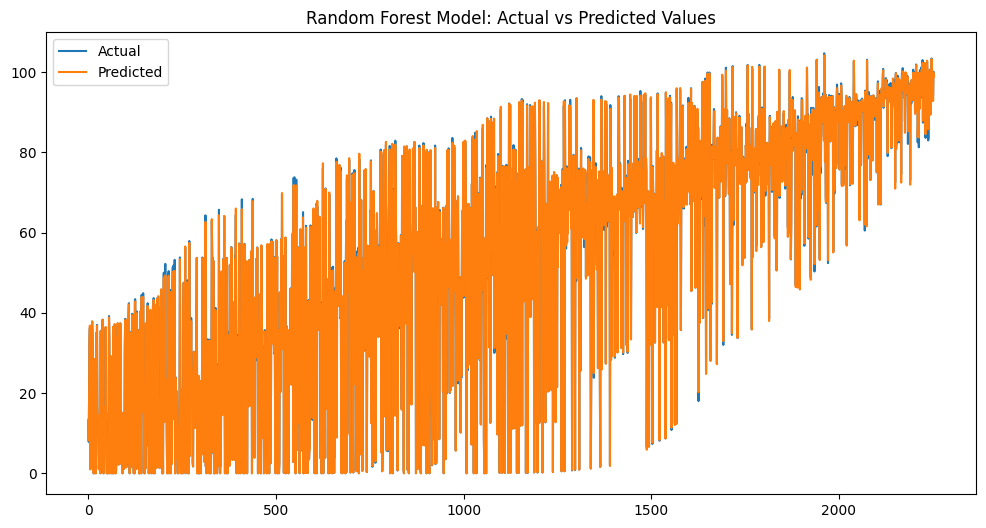


Feature Importance:
             feature  importance
10    Elapsed_Months    0.331162
11         YearMonth    0.303714
0            Country    0.191846
9   Country_AvgPrice    0.144255
1               Year    0.028684
2              Month    0.000089
4          Month_Sin    0.000083
5          Month_Cos    0.000071
3            Quarter    0.000030
7        Quarter_Sin    0.000029
6     Is_Peak_Season    0.000017
12          Semester    0.000015
8               sign    0.000007


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])


# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
rf_predictions = rf_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']])

# Calculate sMAPE
smape_rf = smape(X_val_sorted['FoodPriceIndex'].values, rf_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Random Forest Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester'],
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

sMAPE: 1.15%


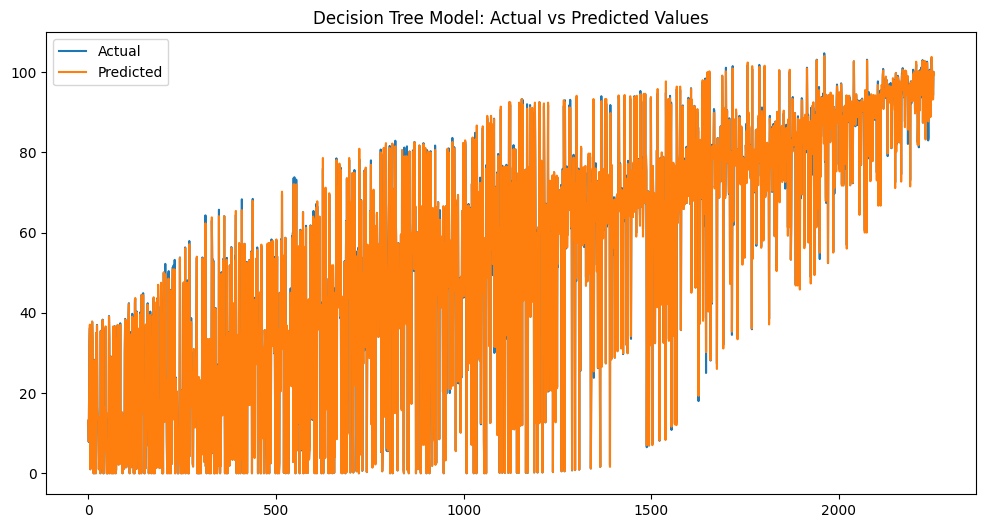


Feature Importance:
             feature  importance
11         YearMonth    0.566025
9   Country_AvgPrice    0.250300
0            Country    0.091217
10    Elapsed_Months    0.089732
1               Year    0.002435
2              Month    0.000080
4          Month_Sin    0.000077
5          Month_Cos    0.000071
3            Quarter    0.000025
7        Quarter_Sin    0.000016
6     Is_Peak_Season    0.000011
12          Semester    0.000008
8               sign    0.000004


In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model (Decision Tree Regressor)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
dt_predictions = dt_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']])

# Calculate sMAPE
smape_dt = smape(X_val_sorted['FoodPriceIndex'].values, dt_predictions)
print(f'sMAPE: {smape_dt:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(dt_predictions, label='Predicted')
plt.title('Decision Tree Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester'],
    'importance': dt_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


sMAPE: 10.06%


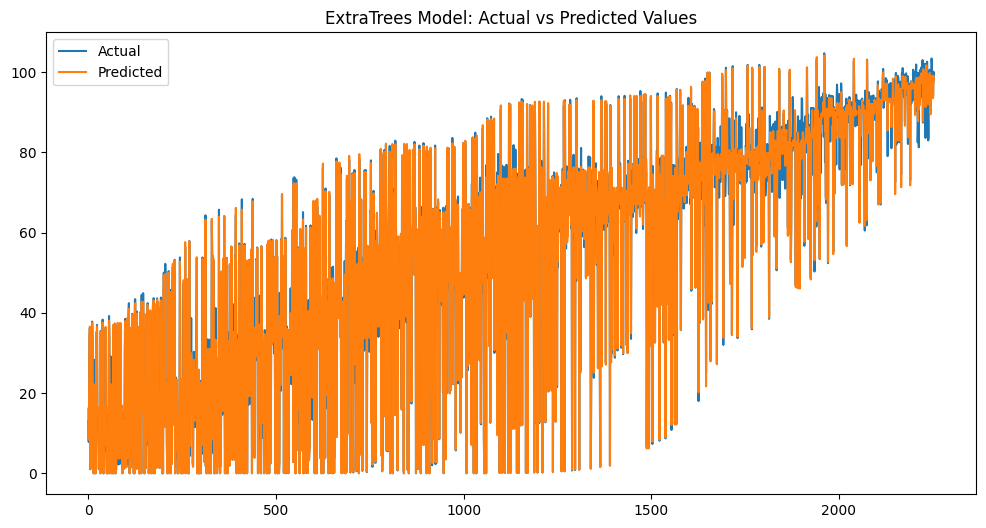


Feature Importance:
             feature  importance
1               Year    0.243976
10    Elapsed_Months    0.207389
11         YearMonth    0.204420
9   Country_AvgPrice    0.178226
0            Country    0.165815
12          Semester    0.000046
2              Month    0.000031
3            Quarter    0.000031
4          Month_Sin    0.000019
7        Quarter_Sin    0.000016
6     Is_Peak_Season    0.000014
5          Month_Cos    0.000014
8               sign    0.000003


In [48]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and train the model with tuned parameters
extra_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
extra_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
extra_predictions = extra_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']])

smape_extra = smape(X_val_sorted['FoodPriceIndex'].values, extra_predictions)
print(f'sMAPE: {smape_extra:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(extra_predictions, label='Predicted')
plt.title('ExtraTrees Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester'],
    'importance': extra_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


sMAPE: 11.94%


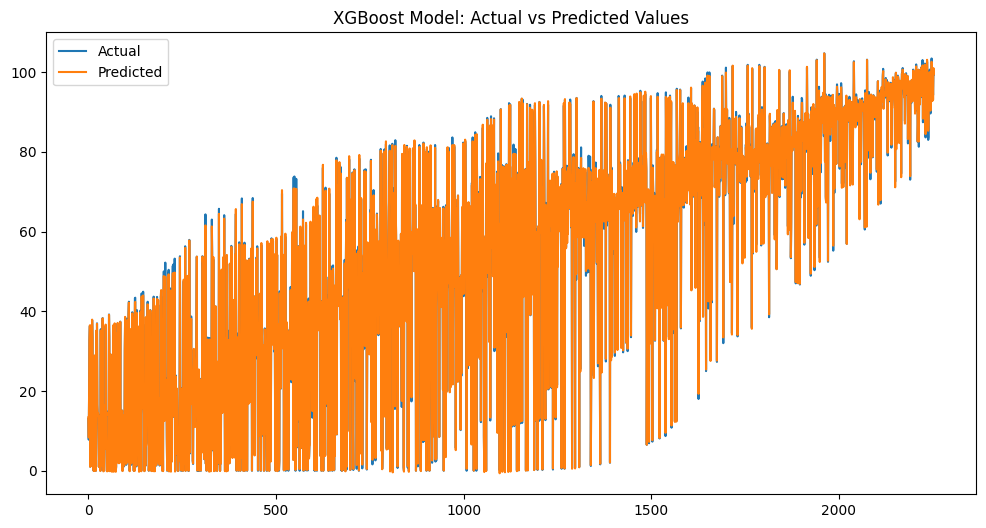


Feature Importance:
             feature  importance
10    Elapsed_Months    0.428135
0            Country    0.186584
1               Year    0.142235
11         YearMonth    0.124002
9   Country_AvgPrice    0.116679
3            Quarter    0.000498
4          Month_Sin    0.000494
8               sign    0.000414
2              Month    0.000353
5          Month_Cos    0.000233
7        Quarter_Sin    0.000226
6     Is_Peak_Season    0.000148
12          Semester    0.000000


In [49]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(
    n_estimators=500,               # Jumlah pohon yang lebih banyak
    learning_rate=0.05,             # Kecepatan pembelajaran yang lebih kecil untuk kestabilan
    max_depth=6,                    # Kedalaman pohon standar
    subsample=0.8,                  # Menggunakan sebagian data untuk setiap pohon
    colsample_bytree=0.8,           # Menggunakan sebagian fitur untuk setiap pohon
    gamma=0.1,                      # Pengurangan minimum untuk pembelahan pohon
    min_child_weight=1,    # Menghentikan pelatihan lebih awal jika tidak ada peningkatan
    tree_method='hist',             # Menggunakan metode histogram untuk pohon yang lebih cepat
    random_state=42                 # Mengatur seed untuk hasil yang dapat direproduksi
)
# Fit the XGBoost model
xgb_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
xgb_predictions = xgb_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester']])

# Calculate sMAPE for XGBoost
smape_xgb = smape(X_val_sorted['FoodPriceIndex'].values, xgb_predictions)
print(f'sMAPE: {smape_xgb:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(xgb_predictions, label='Predicted')
plt.title('XGBoost Model: Actual vs Predicted Values')  # Update title to reflect XGBoost
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos','Is_Peak_Season', 'Quarter_Sin', 'sign', 'Country_AvgPrice','Elapsed_Months', 'YearMonth', 'Semester'],
    'importance': xgb_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

In [232]:
# Check for zero or NaN values in actual values
zero_mask = X_val_sorted['FoodPriceIndex'] == 0
print(f"Zero values in actuals: {X_val_sorted['FoodPriceIndex'][zero_mask].shape[0]}")

# Check for NaN values in actual and predicted values
print(f"NaN values in actuals: {X_val_sorted['FoodPriceIndex'].isna().sum()}")
print(f"NaN values in predictions: {np.isnan(rf_predictions).sum()}")

# Check if actual and predicted values have the same length
print(f"Length of actuals: {len(X_val_sorted['FoodPriceIndex'])}")
print(f"Length of predictions: {len(rf_predictions)}")

# Inspect predictions to ensure they're not constant or unrealistic
print(f"Sample of predictions: {rf_predictions[:10]}")


Zero values in actuals: 103
NaN values in actuals: 0
NaN values in predictions: 0
Length of actuals: 2254
Length of predictions: 2254
Sample of predictions: [13.319   8.049  20.783  33.034  36.6845  1.     16.362   1.375  36.6845
  8.049 ]


In [233]:
# Filter out zero actual values
non_zero_mask = X_val_sorted['FoodPriceIndex'] != 0

# Apply the mask to both actual and predicted values
smape_rf = smape(X_val_sorted['FoodPriceIndex'][non_zero_mask].values, 
                 rf_predictions[non_zero_mask])

print(f'sMAPE: {smape_rf:.2f}%')


Denominator: [ 26.319   15.849   41.383  ... 187.118  199.963  198.4146]
Numerator: [0.638  0.498  0.366  ... 2.564  0.474  0.7708]
sMAPE: 1.02%


## Apply to test set

In [51]:
test.drop('id', axis=1, inplace=True)
test.head()

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Cos
0,Italy,2023,4,2,8.660254e-01,-0.500000,0,-1.000000e+00
1,Denmark,2022,7,3,-5.000000e-01,-0.866025,0,-1.836970e-16
2,United States,2019,6,2,1.224647e-16,-1.000000,0,-1.000000e+00
3,Netherlands,2021,2,1,8.660254e-01,0.500000,1,6.123234e-17
4,Italy,2019,8,3,-8.660254e-01,-0.500000,0,-1.836970e-16


In [ ]:
test['Quarter'] = (test['Month'] - 1) // 3 + 1

test['Month_Sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_Cos'] = np.cos(2 * np.pi * test['Month'] / 12)

test['Is_Peak_Season'] = test['Quarter'].isin([1, 4]).astype(int)  # Asumsi musim panen di kuartal 1 & 4

test['Quarter_Sin'] = np.cos(2 * np.pi * test['Quarter'] / 4)

test['sign'] = test['Month'].apply(lambda x: 1 if x in [3, 11] else 0)

test['Country_AvgPrice'] = test['Country'].map(country_avg)

# Waktu berlalu dari awal dataset
test['Elapsed_Months'] = (test['Year'] - test['Year'].min()) * 12 + test['Month']

# Kombinasi Year dan Month menjadi YYYYMM
test['YearMonth'] = test['Year'] * 100 + test['Month']

# Menambahkan kolom kuartal
test['Quarter'] = ((test['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
test['Semester'] = ((test['Month'] - 1) // 6) + 1

In [54]:
train

,id,Country,Year,Month,FoodPriceIndex,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,sign,Country_AvgPrice,Elapsed_Months,YearMonth,Semester
0,3501,Mexico,1971,11,0.0000,4,-5.000000e-01,8.660254e-01,1,-2.449294e-16,1,25.490485,23,197111,2
1,60601,South Africa,2002,7,43.9000,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,0,25.660707,391,200207,2
2,64399,Japan,2004,8,89.8000,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,80.070155,416,200408,2
3,24227,France,1983,1,48.9000,1,5.000000e-01,8.660254e-01,1,1.000000e+00,0,62.355750,157,198301,1
4,63779,Japan,2004,4,90.2000,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,0,80.070155,412,200404,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000,2,1.224647e-16,-1.000000e+00,0,1.224647e-16,0,61.974369,54,197406,1
11612,32121,Germany,1987,4,66.1407,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,0,68.830241,208,198704,1
11613,8561,Germany,1974,8,45.1606,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,68.830241,56,197408,2
11614,45917,Denmark,1994,9,65.6000,3,-1.000000e+00,-1.836970e-16,0,-1.000000e+00,0,59.473870,297,199409,2


In [66]:
coba = test.copy()

In [67]:
coba = te.transform(coba)
coba

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,sign,Country_AvgPrice,Elapsed_Months,YearMonth,Semester
0,52.708049,2023,4,2,8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,53.095517,112,202304,1
1,59.943839,2022,7,3,-5.000000e-01,-8.660254e-01,0,-1.836970e-16,0,59.473870,103,202207,2
2,55.878469,2019,6,2,1.224647e-16,-1.000000e+00,0,-1.000000e+00,0,55.588998,66,201906,1
3,71.744059,2021,2,1,8.660254e-01,5.000000e-01,1,6.123234e-17,0,71.803340,86,202102,1
4,52.708049,2019,8,3,-8.660254e-01,-5.000000e-01,0,-1.836970e-16,0,53.095517,68,201908,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,1,8.660254e-01,5.000000e-01,1,6.123234e-17,0,62.355750,98,202202,1
2636,59.943839,2020,4,2,8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,59.473870,76,202004,1
2637,43.888835,2017,1,1,5.000000e-01,8.660254e-01,1,6.123234e-17,0,43.862136,37,201701,1
2638,43.888835,2020,3,1,1.000000e+00,6.123234e-17,1,6.123234e-17,1,43.862136,75,202003,1


In [68]:
# apply predictions
test['FoodPriceIndex'] = rf_model.predict(coba)
test

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,sign,Country_AvgPrice,Elapsed_Months,YearMonth,Semester,FoodPriceIndex
0,Italy,2023,4,2,8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,53.095517,112,202304,1,53.895000
1,Denmark,2022,7,3,-5.000000e-01,-8.660254e-01,0,-1.836970e-16,0,59.473870,103,202207,2,61.474000
2,United States,2019,6,2,1.224647e-16,-1.000000e+00,0,-1.000000e+00,0,55.588998,66,201906,1,55.804000
3,Netherlands,2021,2,1,8.660254e-01,5.000000e-01,1,6.123234e-17,0,71.803340,86,202102,1,73.843091
4,Italy,2019,8,3,-8.660254e-01,-5.000000e-01,0,-1.836970e-16,0,53.095517,68,201908,2,52.147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,France,2022,2,1,8.660254e-01,5.000000e-01,1,6.123234e-17,0,62.355750,98,202202,1,63.626000
2636,Denmark,2020,4,2,8.660254e-01,-5.000000e-01,0,-1.000000e+00,0,59.473870,76,202004,1,60.227000
2637,Greece,2017,1,1,5.000000e-01,8.660254e-01,1,6.123234e-17,0,43.862136,37,201701,1,46.001100
2638,Greece,2020,3,1,1.000000e+00,6.123234e-17,1,6.123234e-17,1,43.862136,75,202003,1,46.172100


## Submit

In [70]:
submission = pd.read_csv('sample_submission_adikara2024.csv')
submission.head()

,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


In [71]:
submission['FoodPriceIndex'] = test['FoodPriceIndex']
submission

,id,FoodPriceIndex
0,99116,53.895000
1,97687,61.474000
2,92061,55.804000
3,95122,73.843091
4,92296,52.147000
...,...,...
2635,96922,63.626000
2636,93502,60.227000
2637,87476,46.001100
2638,93366,46.172100


In [72]:
submission.to_csv("submission/submission_with_extraction.csv", index=False)